In [67]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [68]:
load_dotenv()

llm = ChatOpenAI(model="gpt-4o-mini")

In [69]:
class JokeState(TypedDict):
    topic : str
    joke : str
    explanation : str

In [70]:
def generate_joke(state : JokeState):
    prompt = f"generate a joke on the topic {state['topic']}"
    response = llm.invoke(prompt).content

    return {"joke" : response}

In [71]:
def generate_explanation(state : JokeState):
    prompt = f"write an explanation for the joke {state['joke']}"
    response = llm.invoke(prompt).content

    return {"explanation" : response}

In [72]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

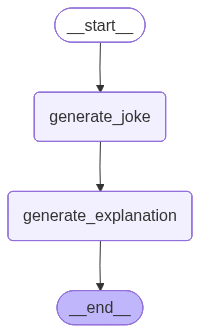

In [73]:
workflow

In [74]:
config1 = {"configurable" : {"thread_id" : "1"}}

In [75]:
initial_state = {
    "topic" : "politics"
}

workflow.invoke(initial_state, config=config1)

{'topic': 'politics',
 'joke': 'Why did the politician bring a ladder to the debate? \n\nBecause they wanted to reach new heights in their career!',
 'explanation': 'The joke "Why did the politician bring a ladder to the debate? Because they wanted to reach new heights in their career!" plays on the dual meaning of the phrase "reach new heights." \n\nIn a literal sense, a ladder is an object used to help someone climb to a higher physical position. In the context of the joke, it humorously suggests that the politician is literally bringing a ladder to help them rise up during a debate. \n\nOn a metaphorical level, "reaching new heights in their career" implies striving for success, achievement, or improvement in their political journey. The humor lies in the absurdity of taking a physical ladder to a debate, highlighting the lengths to which politicians might go to improve their standing, and poking fun at the sometimes over-the-top nature of political ambition. Thus, the joke combines

In [76]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'politics', 'joke': 'Why did the politician bring a ladder to the debate? \n\nBecause they wanted to reach new heights in their career!', 'explanation': 'The joke "Why did the politician bring a ladder to the debate? Because they wanted to reach new heights in their career!" plays on the dual meaning of the phrase "reach new heights." \n\nIn a literal sense, a ladder is an object used to help someone climb to a higher physical position. In the context of the joke, it humorously suggests that the politician is literally bringing a ladder to help them rise up during a debate. \n\nOn a metaphorical level, "reaching new heights in their career" implies striving for success, achievement, or improvement in their political journey. The humor lies in the absurdity of taking a physical ladder to a debate, highlighting the lengths to which politicians might go to improve their standing, and poking fun at the sometimes over-the-top nature of political ambition. Thus

In [77]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'politics', 'joke': 'Why did the politician bring a ladder to the debate? \n\nBecause they wanted to reach new heights in their career!', 'explanation': 'The joke "Why did the politician bring a ladder to the debate? Because they wanted to reach new heights in their career!" plays on the dual meaning of the phrase "reach new heights." \n\nIn a literal sense, a ladder is an object used to help someone climb to a higher physical position. In the context of the joke, it humorously suggests that the politician is literally bringing a ladder to help them rise up during a debate. \n\nOn a metaphorical level, "reaching new heights in their career" implies striving for success, achievement, or improvement in their political journey. The humor lies in the absurdity of taking a physical ladder to a debate, highlighting the lengths to which politicians might go to improve their standing, and poking fun at the sometimes over-the-top nature of political ambition. Thu

In [78]:
config2 = {"configurable" : {"thread_id" : "2"}}

In [79]:
initial_state = {
    "topic" : "sustainable energy"
}

workflow.invoke(initial_state, config=config2)

{'topic': 'sustainable energy',
 'joke': 'Why did the solar panel break up with the wind turbine?\n\nBecause it found the relationship too one-sided!',
 'explanation': 'The joke "Why did the solar panel break up with the wind turbine? Because it found the relationship too one-sided!" plays on a couple of clever wordplay elements and puns.\n\nFirstly, the phrase "one-sided" has a double meaning here. In a relationship context, it often refers to an unbalanced dynamic where one partner is giving more effort, love, or attention than the other. In this case, the solar panel may feel that it is putting in more energy or commitment than the wind turbine.\n\nSecondly, from a scientific perspective, the term "one-sided" can also refer to the nature of how solar panels and wind turbines generate energy. Solar panels convert sunlight into electricity, while wind turbines harness wind energy. The joke humorously suggests that their energy sources lead to an imbalance, as solar energy is only avai

In [80]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'sustainable energy', 'joke': 'Why did the solar panel break up with the wind turbine?\n\nBecause it found the relationship too one-sided!', 'explanation': 'The joke "Why did the solar panel break up with the wind turbine? Because it found the relationship too one-sided!" plays on a couple of clever wordplay elements and puns.\n\nFirstly, the phrase "one-sided" has a double meaning here. In a relationship context, it often refers to an unbalanced dynamic where one partner is giving more effort, love, or attention than the other. In this case, the solar panel may feel that it is putting in more energy or commitment than the wind turbine.\n\nSecondly, from a scientific perspective, the term "one-sided" can also refer to the nature of how solar panels and wind turbines generate energy. Solar panels convert sunlight into electricity, while wind turbines harness wind energy. The joke humorously suggests that their energy sources lead to an imbalance, as solar 

In [81]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'politics', 'joke': 'Why did the politician bring a ladder to the debate? \n\nBecause they wanted to reach new heights in their career!', 'explanation': 'The joke "Why did the politician bring a ladder to the debate? Because they wanted to reach new heights in their career!" plays on the dual meaning of the phrase "reach new heights." \n\nIn a literal sense, a ladder is an object used to help someone climb to a higher physical position. In the context of the joke, it humorously suggests that the politician is literally bringing a ladder to help them rise up during a debate. \n\nOn a metaphorical level, "reaching new heights in their career" implies striving for success, achievement, or improvement in their political journey. The humor lies in the absurdity of taking a physical ladder to a debate, highlighting the lengths to which politicians might go to improve their standing, and poking fun at the sometimes over-the-top nature of political ambition. Thus

In [82]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'politics', 'joke': 'Why did the politician bring a ladder to the debate? \n\nBecause they wanted to reach new heights in their career!', 'explanation': 'The joke "Why did the politician bring a ladder to the debate? Because they wanted to reach new heights in their career!" plays on the dual meaning of the phrase "reach new heights." \n\nIn a literal sense, a ladder is an object used to help someone climb to a higher physical position. In the context of the joke, it humorously suggests that the politician is literally bringing a ladder to help them rise up during a debate. \n\nOn a metaphorical level, "reaching new heights in their career" implies striving for success, achievement, or improvement in their political journey. The humor lies in the absurdity of taking a physical ladder to a debate, highlighting the lengths to which politicians might go to improve their standing, and poking fun at the sometimes over-the-top nature of political ambition. Thu

In [83]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'sustainable energy', 'joke': 'Why did the solar panel break up with the wind turbine?\n\nBecause it found the relationship too one-sided!', 'explanation': 'The joke "Why did the solar panel break up with the wind turbine? Because it found the relationship too one-sided!" plays on a couple of clever wordplay elements and puns.\n\nFirstly, the phrase "one-sided" has a double meaning here. In a relationship context, it often refers to an unbalanced dynamic where one partner is giving more effort, love, or attention than the other. In this case, the solar panel may feel that it is putting in more energy or commitment than the wind turbine.\n\nSecondly, from a scientific perspective, the term "one-sided" can also refer to the nature of how solar panels and wind turbines generate energy. Solar panels convert sunlight into electricity, while wind turbines harness wind energy. The joke humorously suggests that their energy sources lead to an imbalance, as solar

Time Travel

In [84]:
workflow.get_state({"configurable":{"thread_id" : "1", "checkpoint_id":"1f0a8628-34a3-695d-8001-21b491985ca6"}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0a8628-34a3-695d-8001-21b491985ca6'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [87]:
workflow.get_state({"configurable":{"thread_id" : "2", "checkpoint_id":"1f0a8644-1e00-625c-8002-c8800dfc92f5"}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f0a8644-1e00-625c-8002-c8800dfc92f5'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [88]:
workflow.invoke(None, {"configurable":{"thread_id" : "1", "checkpoint_id":"1f0a8dca-4328-6d6f-8000-9a351cc28343"}})

{'topic': 'politics',
 'joke': "Why don't politicians play hide and seek?\n\nBecause good luck hiding when everyone knows they're just going to take a vote!",
 'explanation': 'This joke relies on wordplay and the nature of political processes to create humor. The question sets up an expectation about a game—hide and seek—which typically involves one person counting while others hide. The punchline, however, twists the situation by referencing the political practice of voting.\n\nThe humor arises from two points:\n\n1. **Politicians and their Visibility:** The joke implies that politicians are always in the spotlight and cannot truly "hide" in the way one would in a game. Their actions and decisions are constantly scrutinized, making it hard for them to disappear from public view.\n\n2. **Voting as a Metaphor:** The phrase "everyone knows they\'re just going to take a vote" playfully suggests that instead of searching for the hiders, politicians would revert to a familiar and democratic

In [89]:
workflow.get_state_history({"configurable":{"thread_id" : "1", "checkpoint_id":"1f0a8dca-4328-6d6f-8000-9a351cc28343"}})

<generator object Pregel.get_state_history at 0x0000021227C7A2A0>

In [90]:
for i in workflow.get_state_history({"configurable":{"thread_id" : "1", "checkpoint_id":"1f0a8dca-4328-6d6f-8000-9a351cc28343"}}):
    print(i)

StateSnapshot(values={'topic': 'politics'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8dca-4328-6d6f-8000-9a351cc28343'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-14T09:03:24.953292+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8dca-4300-6ecc-bfff-6e7ec3fbefd6'}}, tasks=(PregelTask(id='65b4b69b-6300-f45f-d9fa-0557e052cf12', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the politician bring a ladder to the debate? \n\nBecause they wanted to reach new heights in their career!'}),), interrupts=())


In [94]:
workflow.update_state({"configurable":{"thread_id" : "1", "checkpoint_id":"1f0a8dca-4328-6d6f-8000-9a351cc28343", "checkpoint_ns":""}}, {'topic':"samosa"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a8e93-4946-69b7-8001-d84d379bf33b'}}

In [95]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8e93-4946-69b7-8001-d84d379bf33b'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-10-14T10:33:21.146853+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8dca-4328-6d6f-8000-9a351cc28343'}}, tasks=(PregelTask(id='6646f35f-8c90-2c5c-e0a2-88310c29496e', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'politics', 'joke': "Why don't politicians play hide and seek?\n\nBecause good luck hiding when everyone knows they're just going to take a vote!", 'explanation': 'This joke relies on wordplay and the nature of political processes to create humor. The question sets up an expectation about a game—hide and seek—which typically involves one person c

In [96]:
workflow.invoke(None, {"configurable" : {"thread_id":"1", "checkpoint_id":"1f0a8e93-4946-69b7-8001-d84d379bf33b"}})

{'topic': 'samosa',
 'joke': "Why did the samosa go to therapy?\n\nBecause it couldn't stop getting stuffed with its feelings!",
 'explanation': 'This joke plays on a pun involving the dual meaning of the word "stuffed." \n\nOn one hand, a samosa is a popular pastry filled with various ingredients, often including potatoes, peas, and spices, making it "stuffed" in the culinary sense. This sets up the imagery of a samosa as a physical object that is literally filled with food.\n\nOn the other hand, the phrase "stuffed with its feelings" refers to someone who is suppressing or not expressing their emotions. When a person experiences intense feelings—such as sadness, anger, or anxiety—they might "stuff" those emotions down instead of expressing them.\n\nThe humor arises from the clever wordplay that combines these two meanings. The joke anthropomorphizes the samosa, suggesting it has emotional struggles just like a person might. The idea of a samosa going to therapy because it can\'t stop

In [97]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Why did the samosa go to therapy?\n\nBecause it couldn't stop getting stuffed with its feelings!", 'explanation': 'This joke plays on a pun involving the dual meaning of the word "stuffed." \n\nOn one hand, a samosa is a popular pastry filled with various ingredients, often including potatoes, peas, and spices, making it "stuffed" in the culinary sense. This sets up the imagery of a samosa as a physical object that is literally filled with food.\n\nOn the other hand, the phrase "stuffed with its feelings" refers to someone who is suppressing or not expressing their emotions. When a person experiences intense feelings—such as sadness, anger, or anxiety—they might "stuff" those emotions down instead of expressing them.\n\nThe humor arises from the clever wordplay that combines these two meanings. The joke anthropomorphizes the samosa, suggesting it has emotional struggles just like a person might. The idea of a samosa going to therapy be